**Exercício 1:** ([Fonte](https://integrada.minhabiblioteca.com.br/reader/books/978-85-216-2337-3/pageid/155)) Considere a equação diferencial
$$
u^{\prime \prime}+0,25 u^{\prime}+2 u=3 \operatorname{sen} t \text {. }
$$

Suponha que também são dadas as condições iniciais
$$
u(0)=2, \quad u^{\prime}(0)=-1 .
$$

Este problema de valor inicial pode servir como modelo para um sistema de vibração mola-massa. Transforme este problema em um sistema equivalente de equações de primeira ordem. 

Estude o comportamento das soluções deste sistema.

*Solução:* Fazendo $u_1 = u$ e $u_2=u'$, então, temos o seguinte sistema de duas equações:

$$
\begin{cases}
u_1' = u_2, \\ 
u_2'  = 3\operatorname{sen}t-0,25u_2-2u_1.
\end{cases}
$$

e as condições iniciais $u_1(0)=2$ e $u_2(0)=-1$.

Vamos agora estudar o comportamento das soluções.

Primeiramente precisamos observar que $u_1$ representa supostamente a posição da massa e $u_2$ a velocidade ja que $u_2 = du/dt$. Como 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# definindo uma malha de pontos 
u1, u2 = np.meshgrid(np.linspace(-5, 5, 21),
                     np.linspace(-3, 3, 21))    

In [5]:
# definindo a função vetorial f = (u1', u2')
f = lambda t, u1, u2: (u2, 3*np.sin(t)-0.25*u2-2*u1)

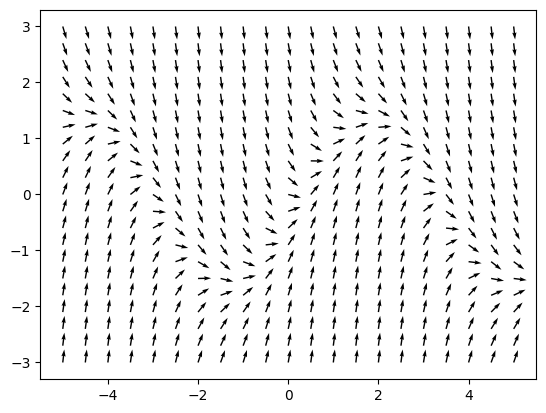

In [6]:
# construindo o campo de vetores para t=1
t = np.full(u1.shape, 1)
du1, du2 = f(u1, u2, t)
norm = np.sqrt(du1**2+du2**2)

plt.quiver(u1,u2, du1/norm, du2/norm)
#plt.streamplot(u1,u2, v1/norm, v2/norm)
plt.show()

Escrevendo em Python a função vetorial $F(\mathbf{u}) = \mathbf{u}'$ dada por

$$
F{u_1\choose u_2}=
\begin{pmatrix}
u_1'\\ 
u_2'
\end{pmatrix} =
\begin{pmatrix}
0 & 1 \\ 
-2 & -0,25 \end{pmatrix}
{u_1\choose u_2} + {0 \choose 3 \text{sen}t}.
$$

In [7]:
# y é um vetor 2d
def F(u, t):
    u1, u2 = u
    return u2, 3*np.sin(t)-0.25*u2-2*u1

Repare que $F(\mathbf{u}) = \mathbf{u}'$ também pode ser escrita como  
$$
\begin{pmatrix}
u_1'\\ 
u_2'
\end{pmatrix} =
{u_2 \choose  3\text{sen}t-2u_1-0,25u_2} \quad \text{ou simplesmente} \quad 
\begin{cases}
u_1' = u_2, \\ 
u_2'  = 3\operatorname{sen}t-0,25u_2-2u_1.
\end{cases}.
$$

Considerando as condições iniciais $u_1(0)=2$ e $u_2(0)=-1$, podemos usar o modulo `scipy.integrade` para resolver o PVI como é mostrado a seguir ([referência](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)).

In [15]:
# resolvemos o PVI associado 
from scipy.integrate import odeint

# discretização de t
ti = np.linspace(0, 30,1000)

# valor inicial
u0=(2,-1)

# resolvendo o sistema
us = odeint(F, u0, ti)
# imprimindo a solução u1(t) e u2(t) para cada ti
print(us)

[[ 2.         -1.        ]
 [ 1.96830608 -1.10990881]
 [ 1.93339395 -1.21430806]
 ...
 [-2.83564541 -0.33355846]
 [-2.84441293 -0.25032571]
 [-2.85067835 -0.16693018]]


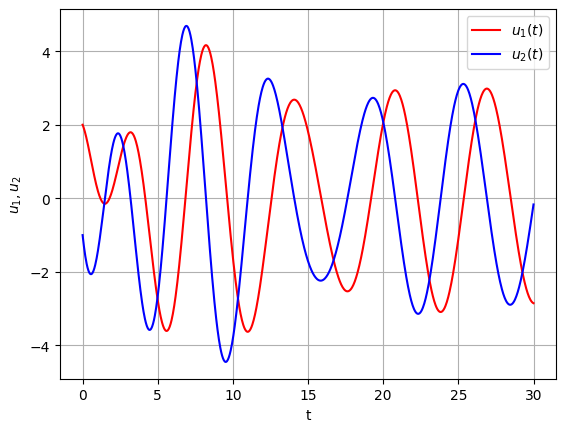

In [16]:
# plotando
plt.plot(ti, us[:, 0], 'r-', label='$u_1(t)$')
plt.plot(ti, us[:, 1], 'b-', label='$u_2(t)$')
plt.xlabel("t")
plt.ylabel("$u_1,u_2$")
plt.legend()
plt.grid()
plt.show()

Vamos experimentar agora usar o Sympy para obter a solução analítica do sistema

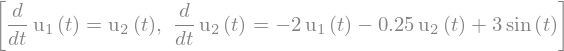

In [18]:
import sympy as sp
sp.init_printing()

t = sp.symbols('t')
u1 = sp.Function('u1') 
u2 = sp.Function('u2')
du1 = sp.Derivative(u1(t), t)
du2 = sp.Derivative(u2(t), t)

eqs = [sp.Eq(du1, u2(t)),
       sp.Eq(du2,  3*sp.sin(t)-0.25*u2(t)-2*u1(t))]
eqs

In [21]:
sol = sp.dsolve(eqs,[u1(t), u2(t)], ics={u1(0): 2, u2(0): -1})
sol

NotImplementedError: 

Como é possível perceber, não deu certo, pois o sistema não é linear. 

Mas numericamente é possível plotar as soluções para diferentes valores iniciais e também as trajetórias $(u_1(t), u_2(t))$ como é mostrado a seguir:

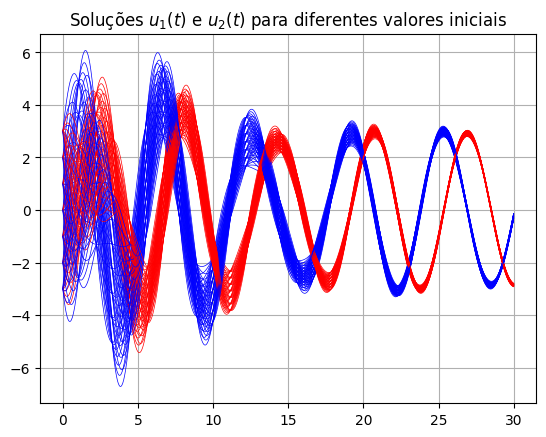

In [23]:
# resolvemos o PVI associado para diferentes valores iniciais
from scipy.integrate import odeint

for y1 in np.linspace(-3,3,7):
    for y2 in np.linspace(-3, 3, 7):
        y0 = (y1,y2)              # definindo o valor inicial da trajetória
        ys = odeint(F, y0, ti)           # resolvendo o sistema
        plt.plot(ti, ys[:, 0], 'r-', lw=0.5)
        plt.plot(ti, ys[:, 1], 'b-', lw=0.5)  


plt.title("Soluções $u_1(t)$ e $u_2(t)$ para diferentes valores iniciais")
plt.grid()
plt.show()

Poltando a trajetória $(u_1(t), u_2(t))$:

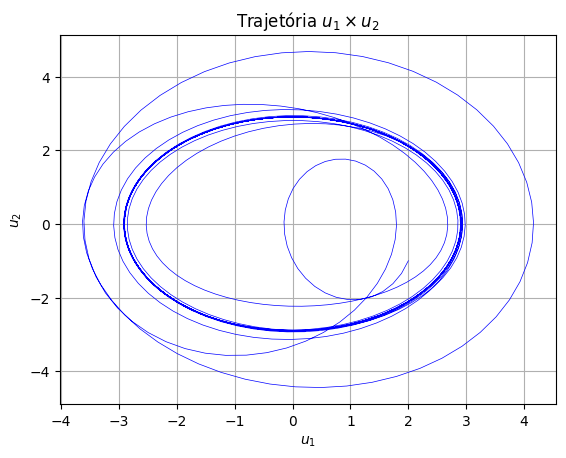

In [30]:
y0 = (2,-1)              # definindo o valor inicial da trajetória
ys = odeint(F, y0, ti)           # resolvendo o sistema
plt.plot(ys[:, 0], ys[:, 1], 'b-', lw=0.5)  


plt.title("Trajetória $u_1 \\times u_2$")
plt.xlabel('$u_1$')
plt.ylabel('$u_2$')
plt.grid()
plt.show()

Plotando o campo de direções para três valores fixos de $t$:


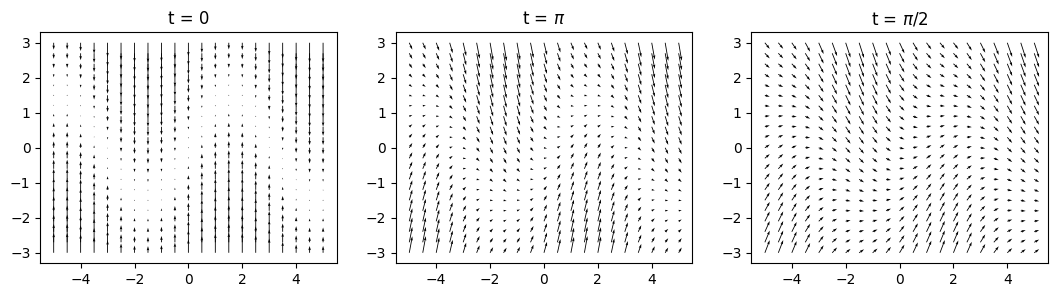

In [26]:
# definindo uma malha de pontos 
u1, u2 = np.meshgrid(np.linspace(-5, 5, 21),
                     np.linspace(-3, 3, 21))    
fig = plt.figure(figsize=(13,3))

ax = fig.add_subplot(131)
t = np.full(u1.shape, 0)
v1, v2 = f(u1, u2, t)
ax.quiver(u1,u2, v1, v2)
plt.title('t = 0')

ax = fig.add_subplot(132)
t = np.full(u1.shape, np.pi/2)
v1, v2 = f(u1, u2, t)
ax.quiver(u1,u2, v1, v2)
plt.title('t = $\pi$')

ax = fig.add_subplot(133)
t = np.full(u1.shape, np.pi)
v1, v2 = f(u1, u2, t)
ax.quiver(u1,u2, v1, v2)
plt.title('t = $\pi/2$')

plt.show()